In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_csv('../data/reference/CELJE.csv', parse_dates=['time'], index_col='time')
df.sort_values(by='time', inplace=True)

In [2]:
df.describe()

,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation_probability,wind_speed_10m,wind_gusts_10m,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,european_aqi
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,167.000000
mean,20.464286,74.500000,15.216071,21.682143,24.017857,5.094048,12.807738,8.898795,5.998193,137.939759,3.841566,0.652410,69.728916,27.910180
std,4.621653,17.593208,1.768125,4.727310,34.125775,4.422976,9.991937,4.302614,2.162840,19.612828,2.923409,0.473376,19.968582,8.128358
min,12.600000,33.000000,11.700000,13.000000,0.000000,0.400000,1.400000,3.700000,2.700000,113.000000,0.500000,0.200000,25.000000,10.000000
25%,17.175000,60.750000,14.000000,18.575000,0.000000,1.875000,5.000000,6.100000,4.425000,123.000000,1.500000,0.300000,54.000000,22.000000
50%,19.500000,77.000000,15.000000,21.000000,3.000000,3.200000,8.800000,7.600000,5.400000,132.000000,3.100000,0.450000,70.500000,28.000000
75%,22.850000,90.250000,16.600000,23.575000,46.000000,7.350000,18.800000,9.850000,7.000000,149.000000,5.400000,1.000000,86.750000,34.500000
max,33.000000,100.000000,20.400000,34.400000,100.000000,19.800000,46.100000,23.300000,11.900000,187.000000,12.700000,2.300000,107.000000,45.000000


In [3]:
df.isnull().sum()

temperature_2m               0
relative_humidity_2m         0
dew_point_2m                 0
apparent_temperature         0
precipitation_probability    0
wind_speed_10m               0
wind_gusts_10m               0
pm10                         2
pm2_5                        2
carbon_monoxide              2
nitrogen_dioxide             2
sulphur_dioxide              2
ozone                        2
european_aqi                 1
dtype: int64

In [4]:
df.fillna(method='ffill', inplace=True)

C:\Users\Tine Šuster\AppData\Local\Temp\ipykernel_24344\4002983762.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


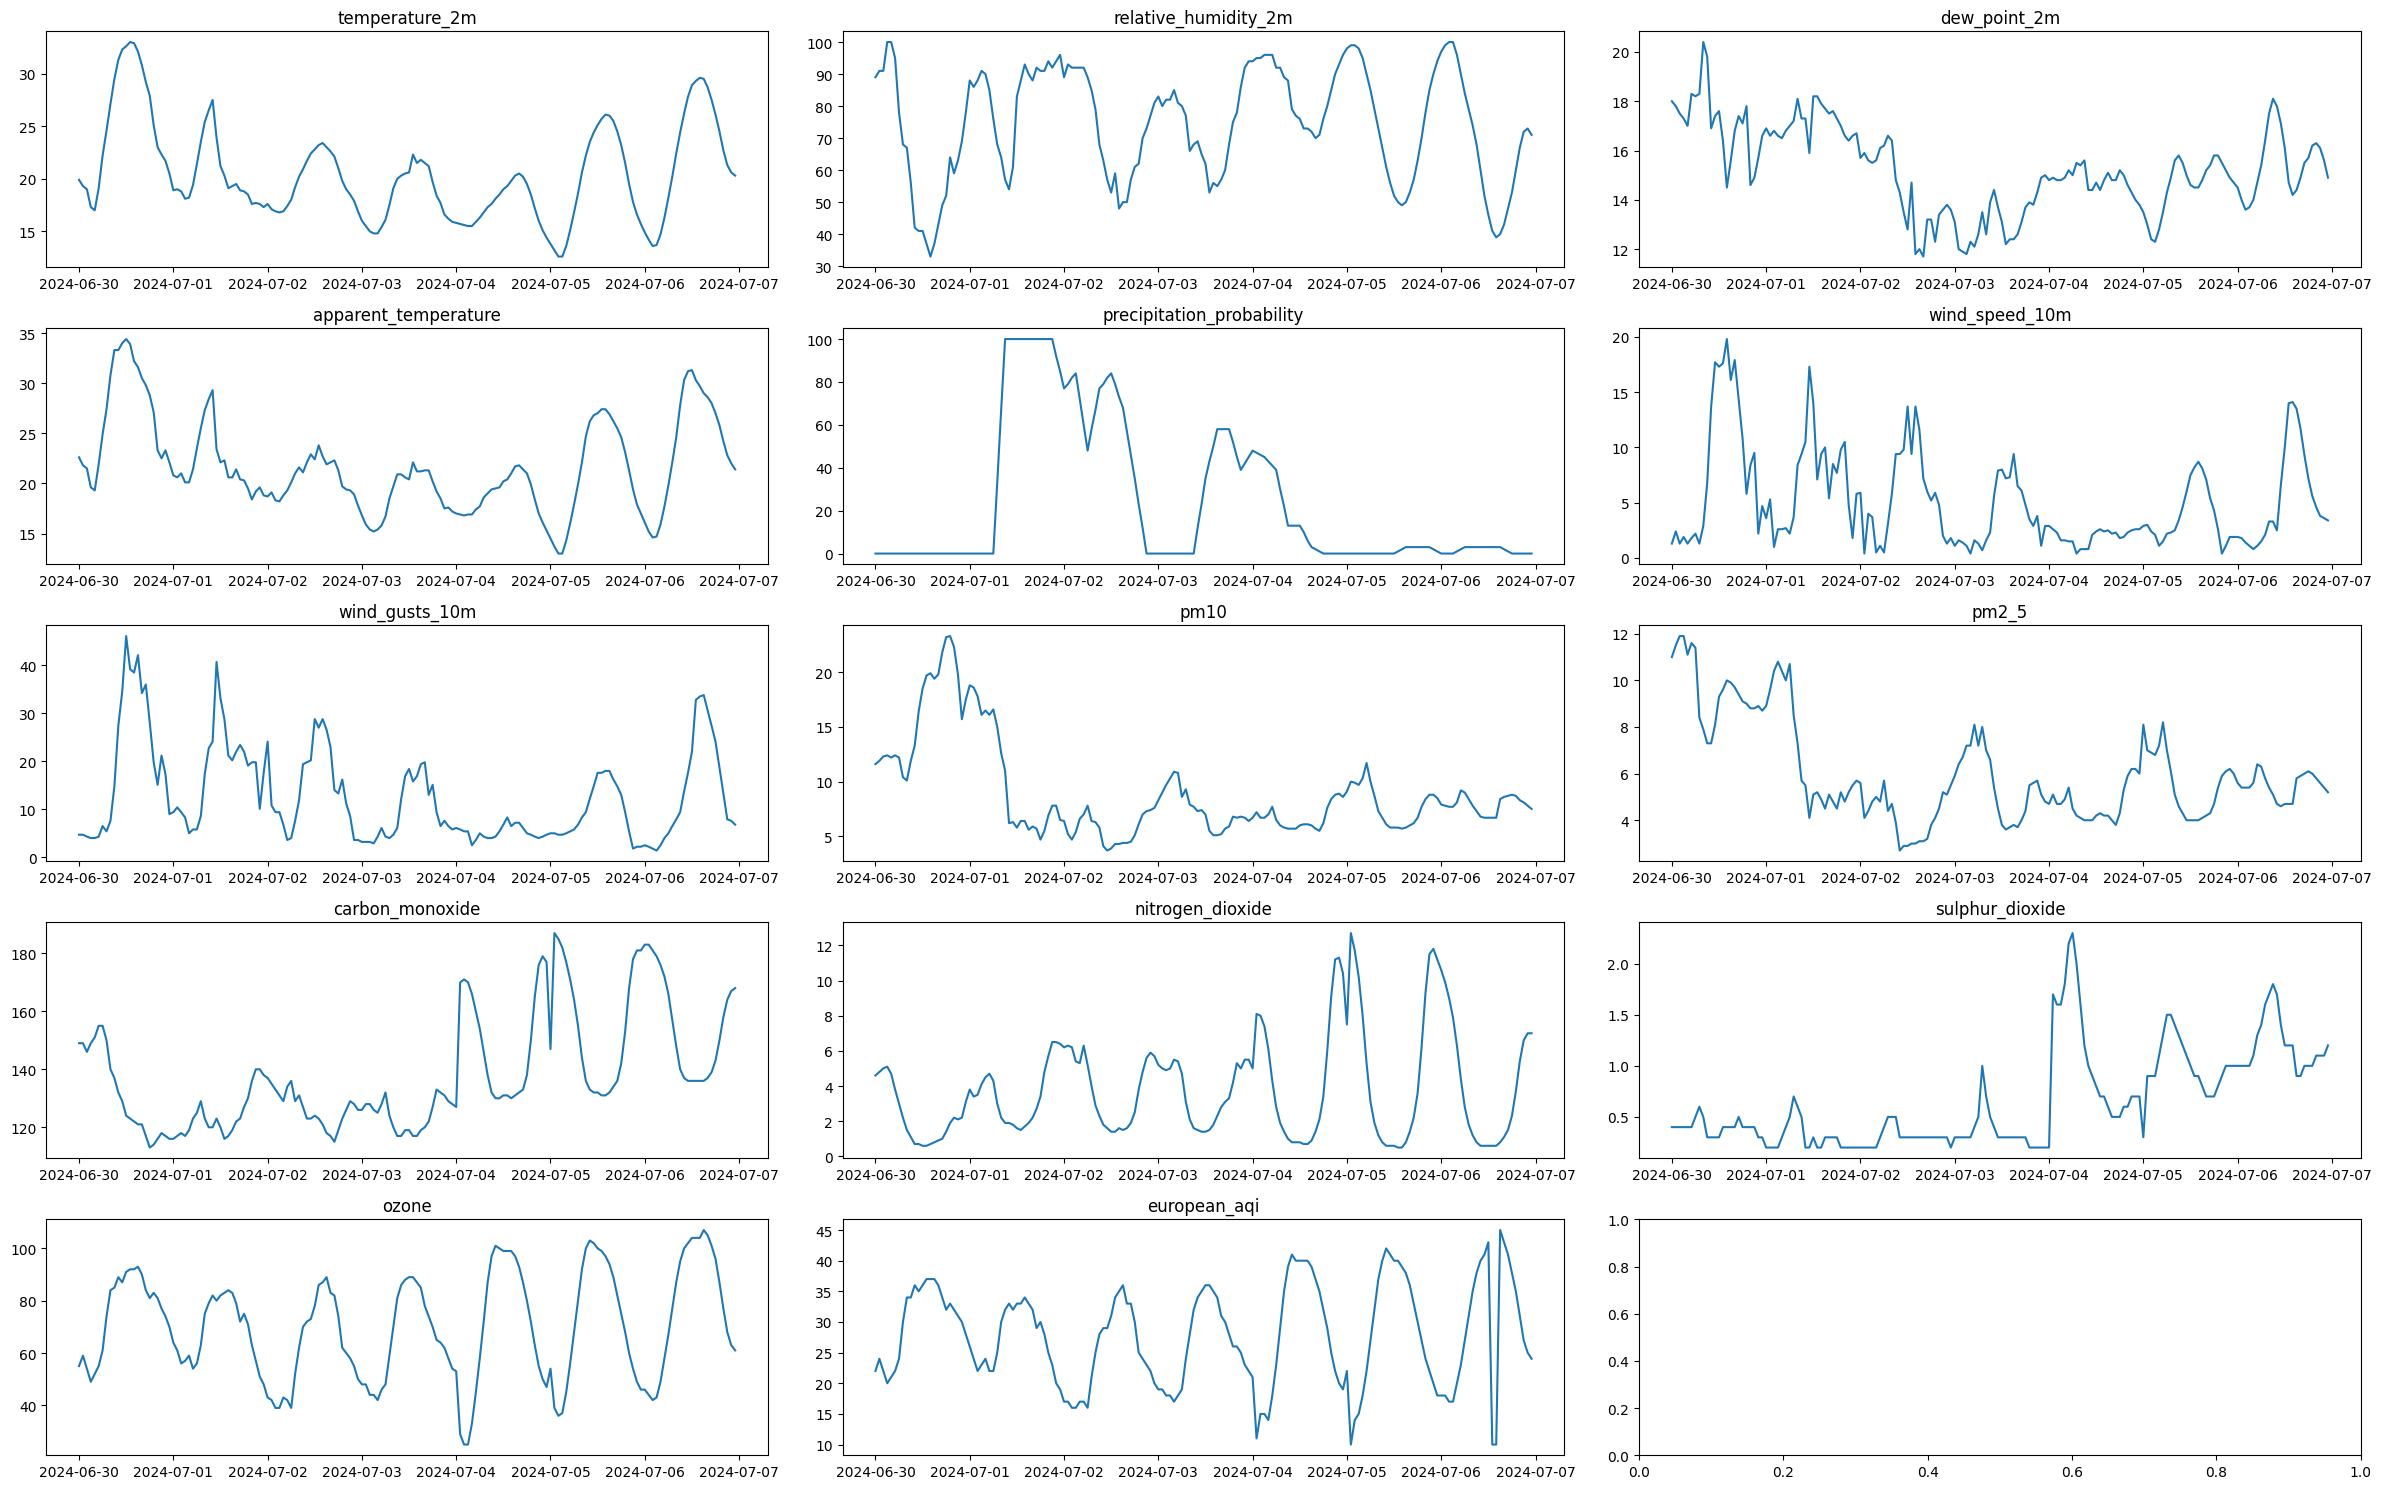

In [5]:
fig, ax = plt.subplots(5, 3, figsize=(24, 15))
ax = ax.flatten()

for i, column in enumerate(df.columns):
    ax[i].plot(df.index, df[column], label=column)
    ax[i].set_title(column)

    ax[i].xaxis.set_major_locator(mdates.DayLocator())
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    ax[i].tick_params(axis='x', labelsize=10, labelright=True)

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.tight_layout()

plt.show()

In [6]:
def plot_distribution(df):
    fig, ax = plt.subplots(5, 3, figsize=(24, 15))
    ax = ax.flatten()

    for i, column in enumerate(df.columns):
        ax[i].hist(df[column], bins=50)
        ax[i].set_title(column)

    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    plt.tight_layout()

    plt.show()

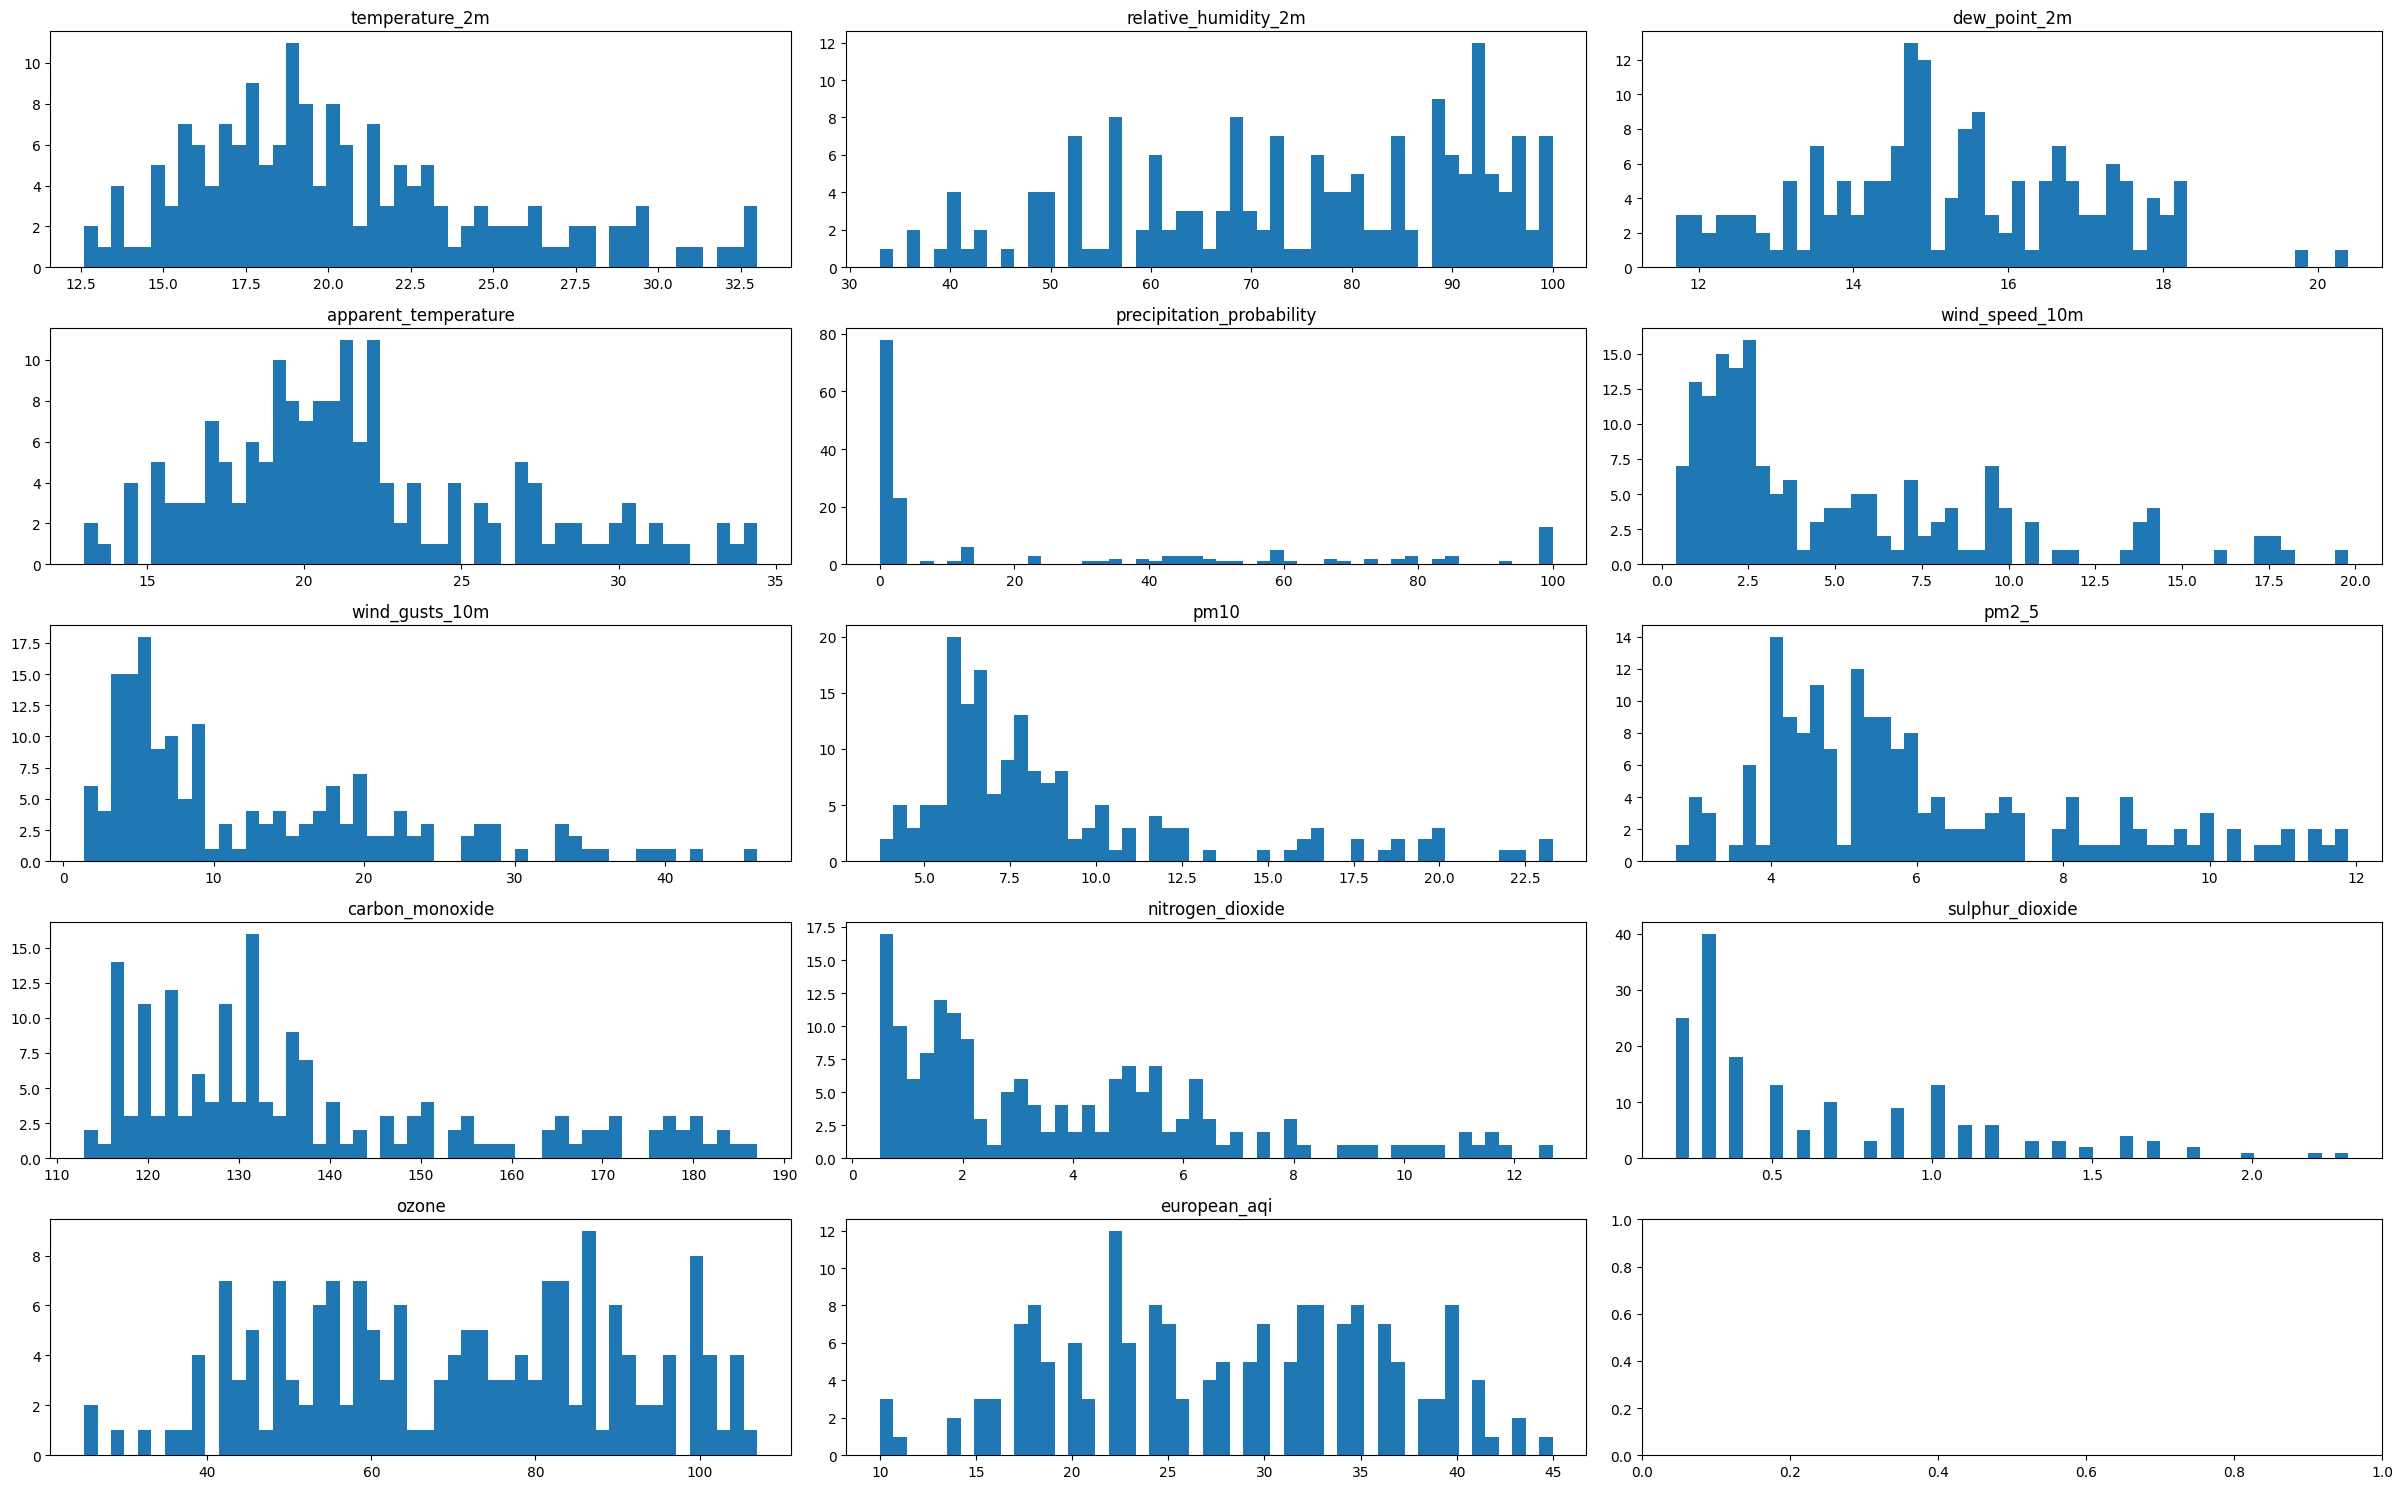

In [7]:
plot_distribution(df)

In [8]:
from sklearn.preprocessing import MinMaxScaler

target = 'european_aqi'
X = df.drop(columns=[target])
y = df[target]

feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X)

target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y.values.reshape(-1, 1))

df_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

df_scaled[target] = y_scaled.flatten()

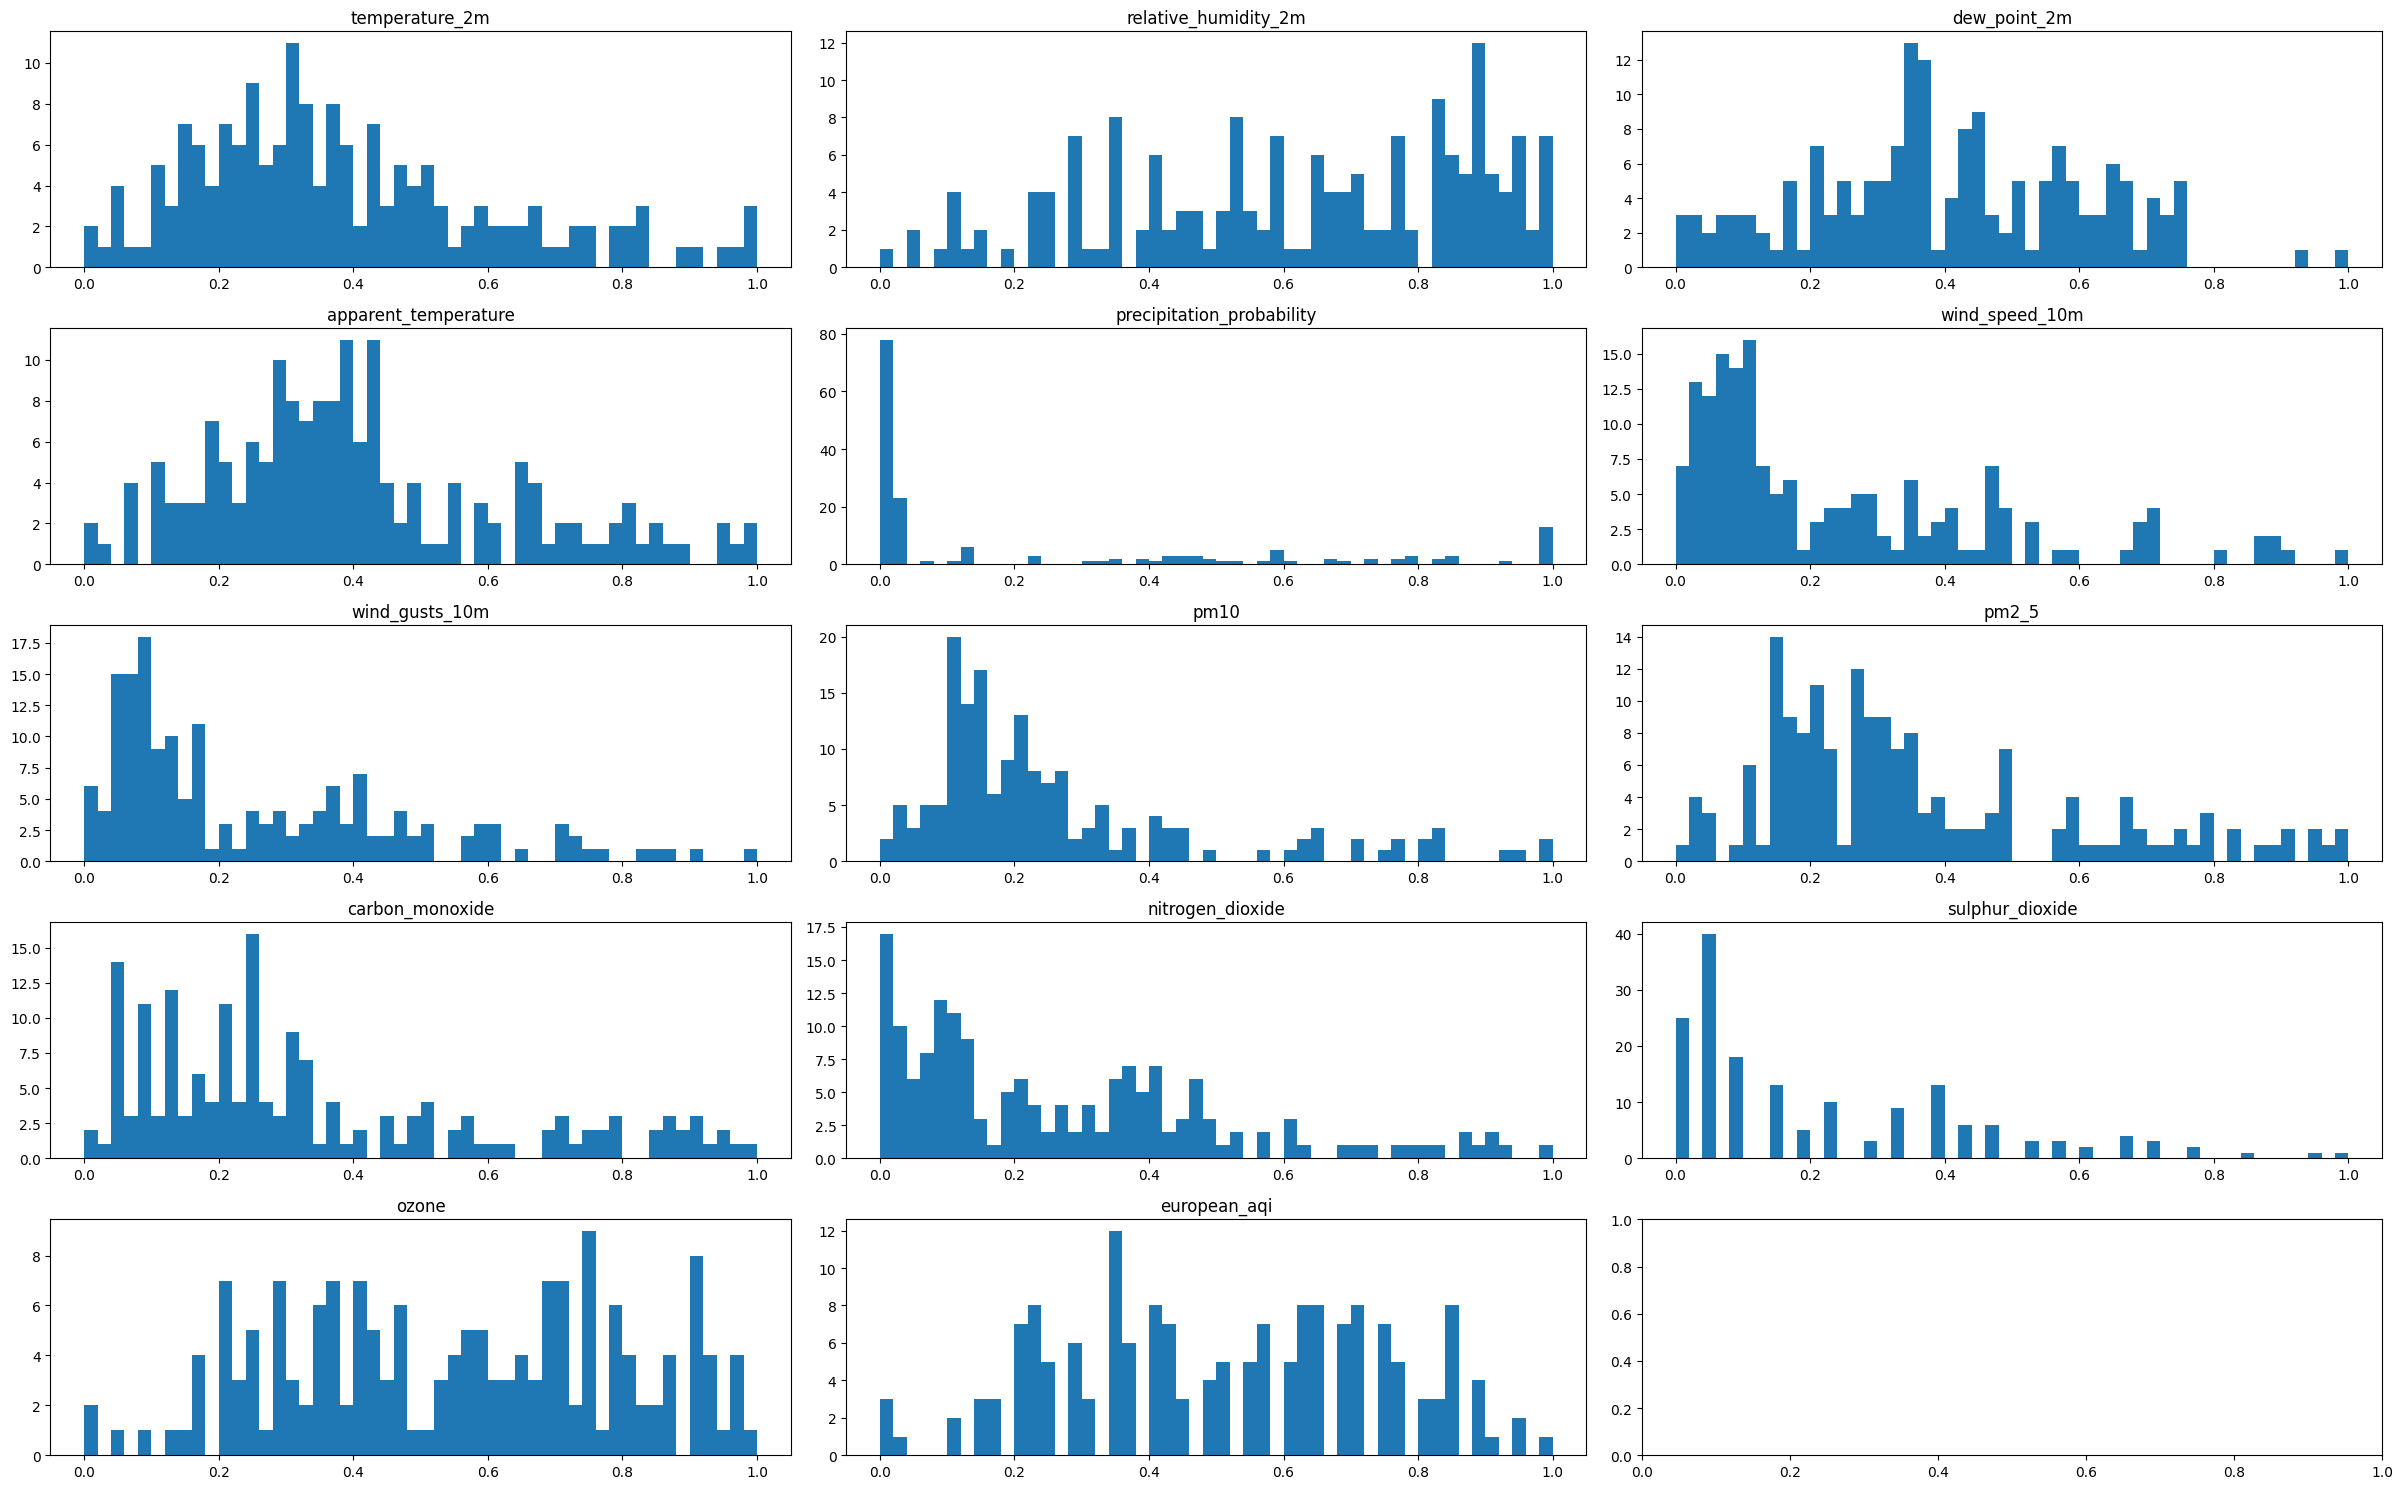

In [9]:
plot_distribution(df_scaled)

In [10]:
df_scaled['temperature_variability'] = df_scaled['temperature_2m'].rolling(window=3).std()
df_scaled['temperature_variability'] = df_scaled['temperature_variability'].fillna(method='bfill')

df_scaled['humidity_adjusted_temp'] = df_scaled['temperature_2m'] * (1 + df_scaled['relative_humidity_2m'])
df_scaled['air_quality_combined'] = (df_scaled['pm10'] + df_scaled['pm2_5'] + df_scaled['nitrogen_dioxide'] + df_scaled[
    'sulphur_dioxide'] + df['ozone']) / 5
df_scaled['precipitation_wind_interaction'] = df_scaled['precipitation_probability'] * df_scaled['wind_speed_10m']
df_scaled['pollutant_range'] = df_scaled[['pm10', 'pm2_5', 'nitrogen_dioxide', 'sulphur_dioxide', 'ozone']].max(
    axis=1) - df_scaled[['pm10', 'pm2_5', 'nitrogen_dioxide', 'sulphur_dioxide', 'ozone']].min(axis=1)

C:\Users\Tine Šuster\AppData\Local\Temp\ipykernel_24344\1094367826.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_scaled['temperature_variability'] = df_scaled['temperature_variability'].fillna(method='bfill')


In [11]:
df_scaled.isnull().sum()

temperature_2m                    0
relative_humidity_2m              0
dew_point_2m                      0
apparent_temperature              0
precipitation_probability         0
wind_speed_10m                    0
wind_gusts_10m                    0
pm10                              0
pm2_5                             0
carbon_monoxide                   0
nitrogen_dioxide                  0
sulphur_dioxide                   0
ozone                             0
european_aqi                      0
temperature_variability           0
humidity_adjusted_temp            0
air_quality_combined              0
precipitation_wind_interaction    0
pollutant_range                   0
dtype: int64

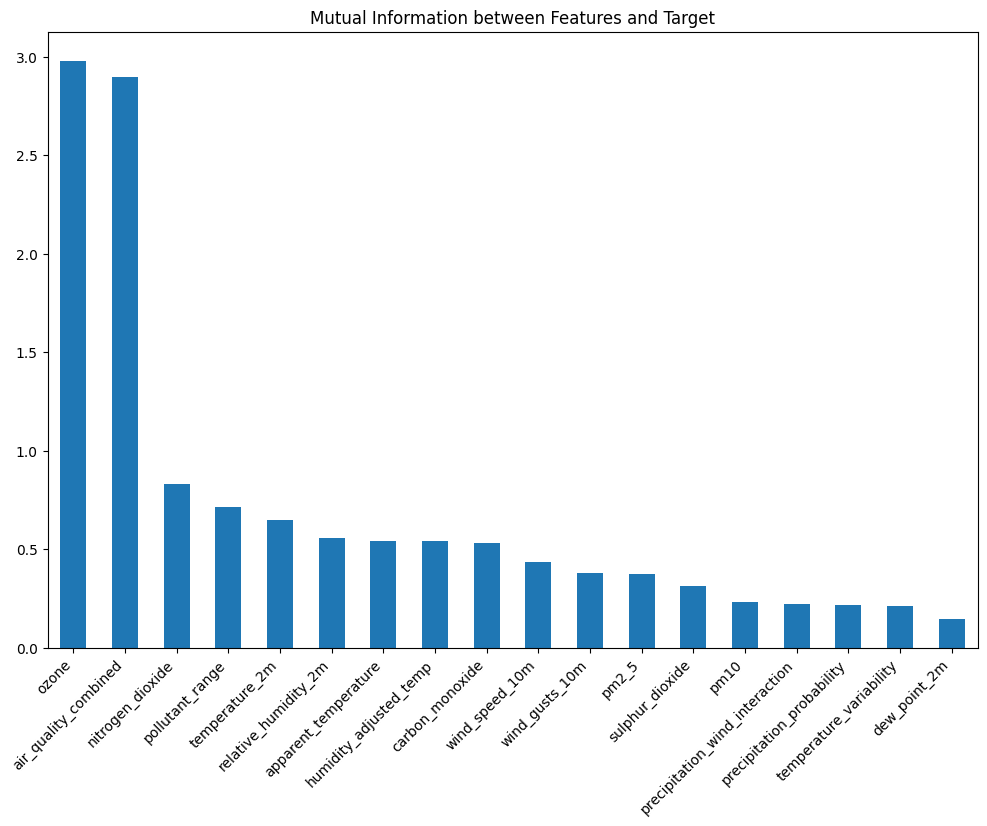

In [12]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(df_scaled.drop(target, axis=1), df_scaled[target])
mi = pd.Series(mi, index=df_scaled.drop(target, axis=1).columns)
mi.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
mi.plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.title('Mutual Information between Features and Target')
plt.show()

In [13]:
main_columns = mi[mi >= 0.5].index.tolist()
print(main_columns)

['ozone', 'air_quality_combined', 'nitrogen_dioxide', 'pollutant_range', 'temperature_2m', 'relative_humidity_2m', 'apparent_temperature', 'humidity_adjusted_temp', 'carbon_monoxide']
